In [24]:
#Importacion de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [388]:
# Cargar el archivo CSV 
dataframe = pd.read_csv("datos.csv")

# Mostrar los primeros registros del DataFrame
dataframe.head(5)

C:\Users\A S U S\AppData\Local\Temp\ipykernel_17636\1086066115.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("datos.csv")


,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
0,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,30.0,3.12,31.2,3.50,35.0,1.50,15.0,8.84,88.4,0.83
1,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.0,1.79,17.9,3.35,33.5,2.51,25.1,8.28,82.8,0.83
2,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,27.5,2.56,25.6,3.50,35.0,2.65,26.5,8.83,88.3,1.00
3,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,15.2,2.11,21.1,3.35,33.5,3.00,30.0,7.73,77.3,0.50
4,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.3,2.61,26.1,2.80,28.0,2.55,25.5,8.37,83.7,1.00


Valores Atípicos

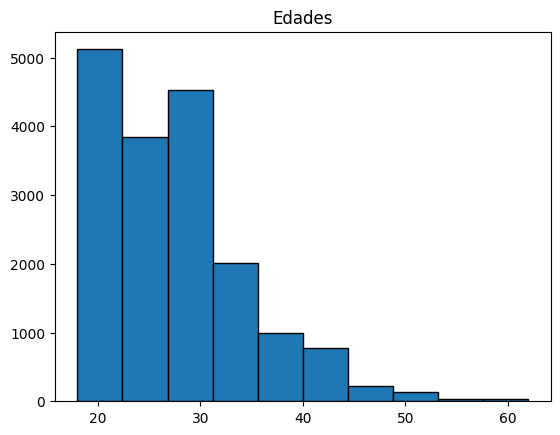

In [266]:
plt.title("Edades")
plt.hist(dataframe["edad"], edgecolor = "black", linewidth =1)
plt.show()

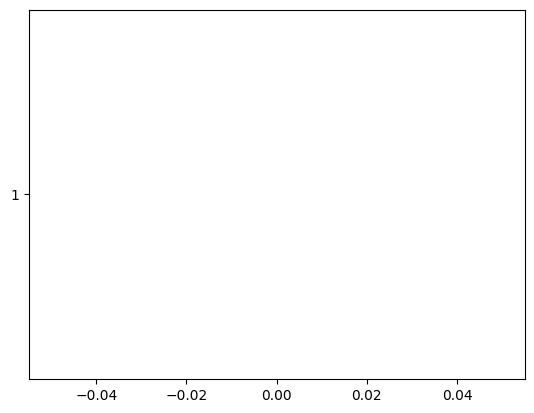

In [179]:
#diagrama de caja y bigotes para ver valores atipicos
plt.boxplot(dataframe["porcentaje_de_beca"], vert=False)
plt.show()

In [267]:
Q1= dataframe["edad"].quantile(0.25)
print("Primer Cuartil", Q1)

Q3= dataframe["edad"].quantile(0.75)
print("Tercer Cuartil", Q3)

IQR = Q3-Q1
print("Rango Intercuartil", IQR)

Mediana = dataframe["edad"].median()
print("Mediana", Mediana)

Valor_Minimo=dataframe["edad"].min()
print("Valor Minimo", Valor_Minimo)

Valor_Maximo = dataframe["edad"].max()
print("Valor Maximo", Valor_Maximo)

Primer Cuartil 22.0
Tercer Cuartil 31.0
Rango Intercuartil 9.0
Mediana 26.0
Valor Minimo 18.0
Valor Maximo 62.0


In [268]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 8.5
BS_Calculado 
 44.5


In [269]:
ubicacion_outliers = (dataframe["edad"] < BI_Calculado) | (dataframe["edad"] > BS_Calculado)
print("\n Ubicación de Outliers \n", ubicacion_outliers)


 Ubicación de Outliers 
 0        False
1        False
2        False
3        False
4        False
         ...  
22818    False
22819    False
22820    False
22821    False
22822    False
Name: edad, Length: 22823, dtype: bool


In [270]:
outliers = dataframe[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       fake_identificacion  ciclo_academico codigo_programa codigo_malla  \
1810   YAWP75614603435972                3         INFO_D1         IFD6   
1811   YAWP75614603435972                3         INFO_D1         IFD6   
1812   YAWP75614603435972                3         INFO_D1         IFD6   
1813   YAWP75614603435972                3         INFO_D1         IFD6   
1814   YAWP75614603435972                3         INFO_D1         IFD6   
...                   ...              ...             ...          ...   
22567  YWSX26500836243015                1         INFO_D1         IFD6   
22568  YWSX26500836243015                1         INFO_D1         IFD6   
22569  YWSX26500836243015                1         INFO_D1         IFD6   
22651  RMZZ71849573589635                6         INFO_D1         IFD6   
22652  RMZZ71849573589635                6         INFO_D1         IFD6   

       codigo_periodo     region        zona          centro  \
1810         

In [271]:
Outliers_Ordenados = outliers.sort_values("edad")
Outliers_Ordenados

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
16619,VXOV84343271123442,3,INFO_D1,IFD6,202062,GUAYAQUIL,GRAN-GYE,SAMBORONDON,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,30.0,3.06,30.6,3.50,35.0,1.5,15.0,8.60,86.0,0.83
2298,VTSK22136214604274,1,INFO_D1,IFD6,202064,ESTADOS UNIDOS,NEW YORK,NEW YORK,NUEVO,CAMBIO DE PROGRAMA,...,32.5,1.00,10.0,NaN,NaN,NaN,NaN,8.20,82.0,0.33
2299,VTSK22136214604274,1,INFO_D1,IFD6,202064,ESTADOS UNIDOS,NEW YORK,NEW YORK,NUEVO,CAMBIO DE PROGRAMA,...,33.3,0.86,8.6,NaN,NaN,NaN,NaN,8.80,88.0,0.17
2300,VTSK22136214604274,2,INFO_D1,IFD6,202162,ESTADOS UNIDOS,NEW YORK,NEW YORK,NUEVO,CAMBIO DE PROGRAMA,...,13.5,3.19,31.9,3.50,35.0,3.0,30.0,8.55,85.5,0.83
2301,VTSK22136214604274,2,INFO_D1,IFD6,202162,ESTADOS UNIDOS,NEW YORK,NEW YORK,NUEVO,CAMBIO DE PROGRAMA,...,30.0,2.38,23.8,3.50,35.0,1.5,15.0,8.01,80.1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,YAWP75614603435972,2,INFO_D1,IFD6,202162,QUITO,METROPOLIT,QUITO-CALDERON,CONTINUO,INGRESO REGULAR,...,19.8,3.00,30.0,3.46,34.6,2.6,26.0,8.48,84.8,0.83
1830,YAWP75614603435972,2,INFO_D1,IFD6,202162,QUITO,METROPOLIT,QUITO-CALDERON,CONTINUO,INGRESO REGULAR,...,28.4,3.50,35.0,3.44,34.4,3.0,30.0,9.59,95.9,1.00
1831,YAWP75614603435972,2,INFO_D1,IFD6,202162,QUITO,METROPOLIT,QUITO-CALDERON,CONTINUO,INGRESO REGULAR,...,29.0,3.17,31.7,3.50,35.0,3.0,30.0,8.50,85.0,0.83
1821,YAWP75614603435972,1,INFO_D1,IFD6,202064,QUITO,METROPOLIT,QUITO-CALDERON,NUEVO,INGRESO REGULAR,...,33.5,0.45,4.5,NaN,NaN,NaN,NaN,8.80,88.0,0.33


In [272]:
ubicacion_sin_outliers = (dataframe["edad"] >= BI_Calculado)& (dataframe["edad"] <= BS_Calculado)
sin_outliers = dataframe[ubicacion_sin_outliers]
sin_outliers

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
0,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,30.0,3.12,31.2,3.50,35.0,1.50,15.0,8.84,88.4,0.83
1,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.0,1.79,17.9,3.35,33.5,2.51,25.1,8.28,82.8,0.83
2,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,27.5,2.56,25.6,3.50,35.0,2.65,26.5,8.83,88.3,1.00
3,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,15.2,2.11,21.1,3.35,33.5,3.00,30.0,7.73,77.3,0.50
4,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.3,2.61,26.1,2.80,28.0,2.55,25.5,8.37,83.7,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22818,FQQB03351579278805,1,INFO_D1,IFD6,202162,GUAYAQUIL,COSTA-INS,LA TRONCAL,NUEVO,INGRESO REGULAR,...,30.0,0.48,4.8,0.00,0.0,2.25,22.5,5.51,55.1,0.50
22819,QIZZ67429179155050,1,INFO_D1,IFD6,202162,LOJA,SUR,LOJA,NUEVO,NaN,...,10.7,0.80,8.0,1.70,17.0,2.42,24.2,3.86,38.6,0.17
22820,QIZZ67429179155050,1,INFO_D1,IFD6,202162,LOJA,SUR,LOJA,NUEVO,NaN,...,30.0,1.00,10.0,3.50,35.0,3.00,30.0,7.48,74.8,0.67
22821,QIZZ67429179155050,1,INFO_D1,IFD6,202162,LOJA,SUR,LOJA,NUEVO,NaN,...,17.6,0.77,7.7,3.06,30.6,3.00,30.0,6.36,63.6,0.50


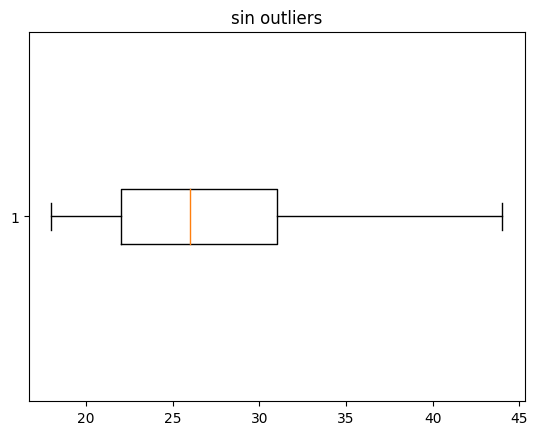

In [273]:
#diagrama de caja y bigotes para ver valores atipicos
plt.title("sin outliers")
plt.boxplot(sin_outliers["edad"], vert=False)
plt.show()

In [274]:
dataframe.shape

(22823, 48)

In [275]:
dataframe.describe()

,ciclo_academico,codigo_periodo,periodo_admision,porcentaje_de_beca,porcentaje_des_matricula,edad,porcentaje_de_discapacidades,numero_discapacidades,numero_reprobaciones,aab1_nota,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
count,22823.000000,22823.000000,22716.000000,20386.000000,21842.000000,17681.000000,22823.000000,22823.000000,22823.000000,22816.000000,...,22700.000000,22268.000000,22268.000000,19507.000000,19507.000000,18943.000000,18943.000000,22823.000000,22823.000000,22823.000000
mean,2.987863,202176.325987,202110.340993,27.151820,25.797088,27.463718,0.546773,0.010516,0.228673,2.684840,...,26.399322,2.414173,24.141728,2.886259,28.862588,2.497202,24.972016,8.059576,80.595759,0.704006
std,1.984888,77.891342,67.434059,28.568684,23.870552,6.999042,5.735753,0.102008,0.507742,0.547633,...,6.725724,0.857639,8.576394,0.970040,9.700396,0.754960,7.549603,1.623546,16.235464,0.288127
min,0.000000,202062.000000,201964.000000,0.000000,5.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,12.500000,0.170000
25%,1.000000,202162.000000,202062.000000,10.000000,20.000000,22.000000,0.000000,0.000000,0.000000,2.380000,...,24.800000,2.000000,20.000000,2.800000,28.000000,2.330000,23.300000,7.590000,75.900000,0.500000
50%,2.000000,202164.000000,202064.000000,10.000000,20.000000,26.000000,0.000000,0.000000,0.000000,2.750000,...,29.000000,2.680000,26.800000,3.350000,33.500000,2.850000,28.500000,8.530000,85.300000,0.830000
75%,4.000000,202262.000000,202162.000000,40.000000,20.000000,31.000000,0.000000,0.000000,0.000000,3.080000,...,30.000000,3.060000,30.600000,3.500000,35.000000,3.000000,30.000000,9.150000,91.500000,1.000000
max,9.000000,202264.000000,202264.000000,100.000000,130.000000,62.000000,90.000000,1.000000,3.000000,3.500000,...,35.000000,3.500000,35.000000,3.500000,35.000000,3.000000,30.000000,10.000000,100.000000,1.000000


In [276]:
dataframe["numero_discapacidades"].describe().round(2)

count    22823.00
mean         0.01
std          0.10
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: numero_discapacidades, dtype: float64

In [277]:
dataframe.describe()

,ciclo_academico,codigo_periodo,periodo_admision,porcentaje_de_beca,porcentaje_des_matricula,edad,porcentaje_de_discapacidades,numero_discapacidades,numero_reprobaciones,aab1_nota,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
count,22823.000000,22823.000000,22716.000000,20386.000000,21842.000000,17681.000000,22823.000000,22823.000000,22823.000000,22816.000000,...,22700.000000,22268.000000,22268.000000,19507.000000,19507.000000,18943.000000,18943.000000,22823.000000,22823.000000,22823.000000
mean,2.987863,202176.325987,202110.340993,27.151820,25.797088,27.463718,0.546773,0.010516,0.228673,2.684840,...,26.399322,2.414173,24.141728,2.886259,28.862588,2.497202,24.972016,8.059576,80.595759,0.704006
std,1.984888,77.891342,67.434059,28.568684,23.870552,6.999042,5.735753,0.102008,0.507742,0.547633,...,6.725724,0.857639,8.576394,0.970040,9.700396,0.754960,7.549603,1.623546,16.235464,0.288127
min,0.000000,202062.000000,201964.000000,0.000000,5.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,12.500000,0.170000
25%,1.000000,202162.000000,202062.000000,10.000000,20.000000,22.000000,0.000000,0.000000,0.000000,2.380000,...,24.800000,2.000000,20.000000,2.800000,28.000000,2.330000,23.300000,7.590000,75.900000,0.500000
50%,2.000000,202164.000000,202064.000000,10.000000,20.000000,26.000000,0.000000,0.000000,0.000000,2.750000,...,29.000000,2.680000,26.800000,3.350000,33.500000,2.850000,28.500000,8.530000,85.300000,0.830000
75%,4.000000,202262.000000,202162.000000,40.000000,20.000000,31.000000,0.000000,0.000000,0.000000,3.080000,...,30.000000,3.060000,30.600000,3.500000,35.000000,3.000000,30.000000,9.150000,91.500000,1.000000
max,9.000000,202264.000000,202264.000000,100.000000,130.000000,62.000000,90.000000,1.000000,3.000000,3.500000,...,35.000000,3.500000,35.000000,3.500000,35.000000,3.000000,30.000000,10.000000,100.000000,1.000000


In [330]:
null_counts = dataframe.isnull().mean() * 100
# Ordenar los porcentajes de valores nulos de forma descendente
null = null_counts.sort_values(ascending=False)
# Obtener los valores más altos
v = null.head(410)
# Imprimir los valores más altos
print(v.round(2))

fake_identificacion             0.0
ciclo_academico                 0.0
tipo_discapacidad               0.0
porcentaje_de_discapacidades    0.0
numero_discapacidades           0.0
curso_codigo                    0.0
curso_nombre                    0.0
numero_reprobaciones            0.0
status                          0.0
aab1_nota                       0.0
aab1_ponderado                  0.0
acdb1_nota                      0.0
acdb1_ponderado                 0.0
apeb1_nota                      0.0
apeb1_ponderado                 0.0
aab2_nota                       0.0
aab2_ponderado                  0.0
acdb2_nota                      0.0
acdb2_ponderado                 0.0
apeb2_nota                      0.0
apeb2_ponderado                 0.0
final_nota                      0.0
final_ponderado                 0.0
discapacidad                    0.0
sexo                            0.0
edad                            0.0
estatus_cursos                  0.0
codigo_programa             

Tratamiento de datos faltantes

In [331]:
dataframe['tipo_de_ingreso'].fillna("DESCONOCIDA", inplace=True)

In [280]:
dataframe['descripcion_de_becas'].fillna("SIN BECA", inplace=True)

In [281]:
dataframe['porcentaje_de_beca'].fillna("0", inplace=True)

In [282]:
dataframe['convenios_y_contratos'].fillna("SIN CONVENIO Y CONTRATO", inplace=True)

In [283]:
dataframe['sexo'].fillna("SIN ESPECIFICAR", inplace=True)

In [284]:
dataframe['descripcion_descuento'].fillna("SIN DESCUENTO", inplace=True)

In [285]:
dataframe['formas_de_pago'].fillna("SIN FORMA DE PAGO", inplace=True)

In [286]:
dataframe['tipo_de_pago'].fillna("NO DEFINIDO", inplace=True)

In [287]:
dataframe['porcentaje_des_matricula'].fillna("DESCONOCIDO", inplace=True)

In [288]:
dataframe['monto_descuento_automatico'].fillna("DESCONOCIDO", inplace=True)

In [289]:
dataframe['periodo_admision'].fillna("DESCONOCIDO", inplace=True)

In [290]:
# Llenar valores faltantes con -1
dataframe['edad'] = dataframe['edad'].fillna(28)

# El DataFrame resultante tendrá todos los valores faltantes reemplazados por -1
print(dataframe)

      fake_identificacion  ciclo_academico codigo_programa codigo_malla  \
0      XTLA48155273548078                6         INFO_D1         IFD6   
1      XTLA48155273548078                6         INFO_D1         IFD6   
2      XTLA48155273548078                6         INFO_D1         IFD6   
3      XTLA48155273548078                6         INFO_D1         IFD6   
4      XTLA48155273548078                6         INFO_D1         IFD6   
...                   ...              ...             ...          ...   
22818  FQQB03351579278805                1         INFO_D1         IFD6   
22819  QIZZ67429179155050                1         INFO_D1         IFD6   
22820  QIZZ67429179155050                1         INFO_D1         IFD6   
22821  QIZZ67429179155050                1         INFO_D1         IFD6   
22822  VJTZ54792463171360                1         INFO_D1         IFD6   

       codigo_periodo     region        zona           centro  \
0              202164      QUITO  

In [292]:
# Llenar valores faltantes con -1
dataframe = dataframe.fillna(-1)

# El DataFrame resultante tendrá todos los valores faltantes reemplazados por -1
print(dataframe)

      fake_identificacion  ciclo_academico codigo_programa codigo_malla  \
0      XTLA48155273548078                6         INFO_D1         IFD6   
1      XTLA48155273548078                6         INFO_D1         IFD6   
2      XTLA48155273548078                6         INFO_D1         IFD6   
3      XTLA48155273548078                6         INFO_D1         IFD6   
4      XTLA48155273548078                6         INFO_D1         IFD6   
...                   ...              ...             ...          ...   
22818  FQQB03351579278805                1         INFO_D1         IFD6   
22819  QIZZ67429179155050                1         INFO_D1         IFD6   
22820  QIZZ67429179155050                1         INFO_D1         IFD6   
22821  QIZZ67429179155050                1         INFO_D1         IFD6   
22822  VJTZ54792463171360                1         INFO_D1         IFD6   

       codigo_periodo     region        zona           centro  \
0              202164      QUITO  

In [389]:
null_counts = dataframe.isnull().mean() * 100
# Ordenar los porcentajes de valores nulos de forma descendente
null = null_counts.sort_values(ascending=False)
# Obtener los valores más altos
v = null.head(410)
# Imprimir los valores más altos
print(v.round(2))

fake_identificacion             0.0
ciclo_academico                 0.0
tipo_discapacidad               0.0
porcentaje_de_discapacidades    0.0
numero_discapacidades           0.0
curso_codigo                    0.0
curso_nombre                    0.0
numero_reprobaciones            0.0
status                          0.0
aab1_nota                       0.0
aab1_ponderado                  0.0
acdb1_nota                      0.0
acdb1_ponderado                 0.0
apeb1_nota                      0.0
apeb1_ponderado                 0.0
aab2_nota                       0.0
aab2_ponderado                  0.0
acdb2_nota                      0.0
acdb2_ponderado                 0.0
apeb2_nota                      0.0
apeb2_ponderado                 0.0
final_nota                      0.0
final_ponderado                 0.0
discapacidad                    0.0
sexo                            0.0
edad                            0.0
estatus_cursos                  0.0
codigo_programa             

In [294]:
dataframe.to_csv('datos.csv', index=False)

In [295]:
dataframe.head()

,fake_identificacion,ciclo_academico,codigo_programa,codigo_malla,codigo_periodo,region,zona,centro,tipo_de_est_programa,tipo_de_ingreso,...,apeb1_ponderado,aab2_nota,aab2_ponderado,acdb2_nota,acdb2_ponderado,apeb2_nota,apeb2_ponderado,final_nota,final_ponderado,tasa_aprobacion
0,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,30.0,3.12,31.2,3.50,35.0,1.50,15.0,8.84,88.4,0.83
1,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.0,1.79,17.9,3.35,33.5,2.51,25.1,8.28,82.8,0.83
2,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,27.5,2.56,25.6,3.50,35.0,2.65,26.5,8.83,88.3,1.00
3,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,15.2,2.11,21.1,3.35,33.5,3.00,30.0,7.73,77.3,0.50
4,XTLA48155273548078,6,INFO_D1,IFD6,202164,QUITO,METROPOLIT,QUITO-TURUBAMBA,CONTINUO,ADAPTACION DE CARRERA/MALLA,...,26.3,2.61,26.1,2.80,28.0,2.55,25.5,8.37,83.7,1.00


de categoricas a numerica

In [229]:
categorica=dataframe.filter(["status","discapacidad","tipo_discapacidad","sexo"])
categorica.head(10)

,status,discapacidad,tipo_discapacidad,sexo
0,APROBADA,NO,NO DEFINIDO,MUJER
1,APROBADA,NO,NO DEFINIDO,MUJER
2,APROBADA,NO,NO DEFINIDO,MUJER
3,APROBADA,NO,NO DEFINIDO,MUJER
4,APROBADA,NO,NO DEFINIDO,MUJER
5,APROBADA,NO,NO DEFINIDO,MUJER
6,APROBADA,NO,NO DEFINIDO,MUJER
7,APROBADA,NO,NO DEFINIDO,MUJER
8,APROBADA,NO,NO DEFINIDO,MUJER
9,APROBADA,NO,NO DEFINIDO,MUJER


In [230]:
categorica.iloc[:,0]

0         APROBADA
1         APROBADA
2         APROBADA
3         APROBADA
4         APROBADA
           ...    
22818    REPROBADA
22819    REPROBADA
22820     APROBADA
22821    REPROBADA
22822    REPROBADA
Name: status, Length: 22823, dtype: object

In [231]:
cat_numerica= pd.get_dummies(categorica.iloc[:,0], drop_first=False)
cat_numerica

,APROBADA,REPROBADA
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
22818,False,True
22819,False,True
22820,True,False
22821,False,True


In [232]:
print(dataframe)

      fake_identificacion  ciclo_academico codigo_programa codigo_malla  \
0      XTLA48155273548078                6         INFO_D1         IFD6   
1      XTLA48155273548078                6         INFO_D1         IFD6   
2      XTLA48155273548078                6         INFO_D1         IFD6   
3      XTLA48155273548078                6         INFO_D1         IFD6   
4      XTLA48155273548078                6         INFO_D1         IFD6   
...                   ...              ...             ...          ...   
22818  FQQB03351579278805                1         INFO_D1         IFD6   
22819  QIZZ67429179155050                1         INFO_D1         IFD6   
22820  QIZZ67429179155050                1         INFO_D1         IFD6   
22821  QIZZ67429179155050                1         INFO_D1         IFD6   
22822  VJTZ54792463171360                1         INFO_D1         IFD6   

       codigo_periodo     region        zona           centro  \
0              202164      QUITO  

In [296]:
pd.value_counts(dataframe['sexo'])

sexo
HOMBRE             14398
SIN ESPECIFICAR     5374
MUJER               3051
Name: count, dtype: int64

In [297]:
pd.value_counts(dataframe['status'])

status
APROBADA     19168
REPROBADA     3655
Name: count, dtype: int64

In [298]:
pd.value_counts(dataframe['region'])

region
QUITO             11348
CUENCA             3662
GUAYAQUIL          3143
LOJA               2836
SANTO DOMINGO      1623
ESPAÑA               87
ESTADOS UNIDOS       63
ITALIA               61
Name: count, dtype: int64

In [299]:
#tabla de frecuencia relativa de status
100*dataframe['status'].value_counts() / len(dataframe['status'])

status
APROBADA     83.985453
REPROBADA    16.014547
Name: count, dtype: float64

In [300]:
# Tabla de contingencia class / survived
pd.crosstab(index=dataframe['ciclo_academico'],
            columns=dataframe['status'], margins=True)

status,APROBADA,REPROBADA,All
ciclo_academico,,,
0,1,1,2
1,4929,1732,6661
2,4227,788,5015
3,3221,455,3676
4,2181,361,2542
5,1732,153,1885
6,1305,61,1366
7,878,86,964
8,462,10,472


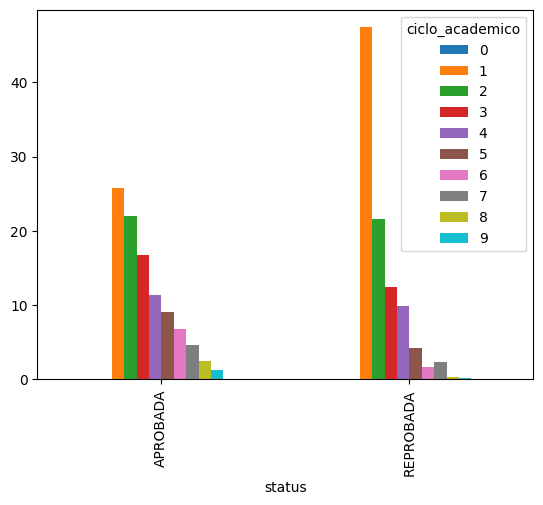

In [301]:
# Gráfico de barras de ciclo academico segun status
plot = pd.crosstab(index=dataframe['status'],
            columns=dataframe['ciclo_academico']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

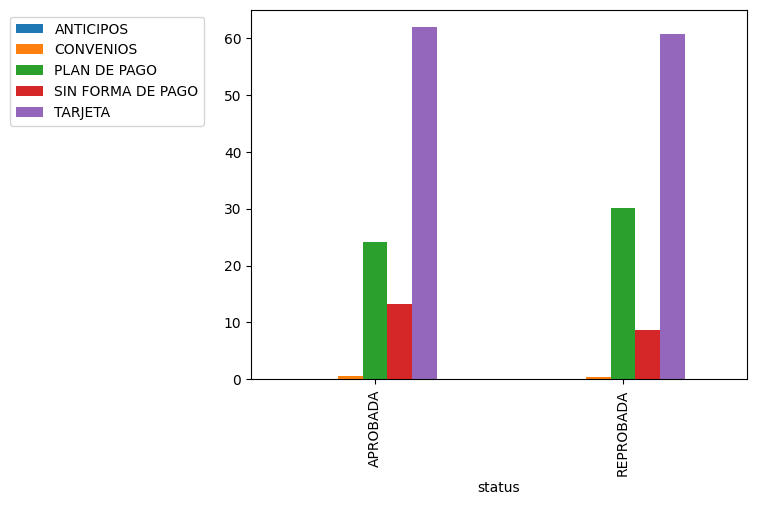

In [256]:
# Gráfico de barras de ciclo academico segun status
plot = pd.crosstab(index=dataframe['status'],
            columns=dataframe['formas_de_pago']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar') 
plt.legend(loc= "upper left", bbox_to_anchor=(-0.5, 1))

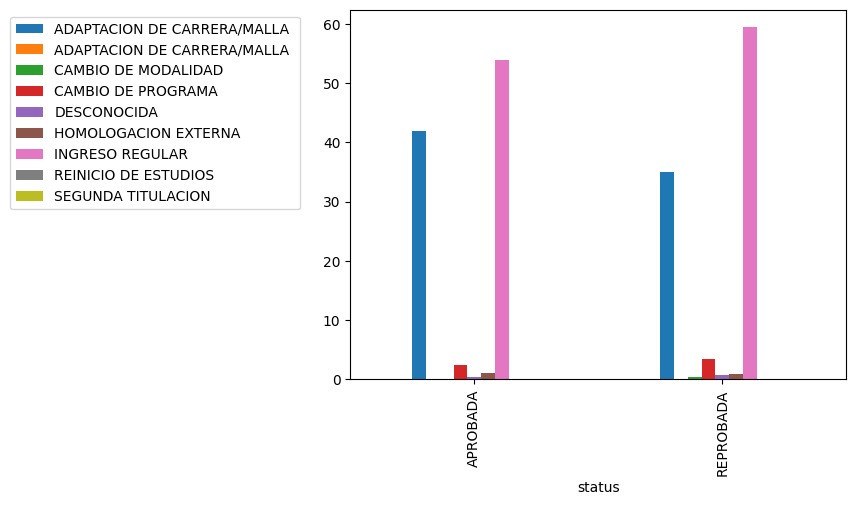

In [259]:
# Gráfico de barras de ciclo academico segun status
plot = pd.crosstab(index=dataframe['status'],
            columns=dataframe['tipo_de_ingreso']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.legend(loc= "upper left", bbox_to_anchor=(-0.7, 1))

In [302]:
# Tabla de contingencia
pd.crosstab(index=dataframe['tipo_discapacidad'],
            columns=dataframe['status'], margins=True)

status,APROBADA,REPROBADA,All
tipo_discapacidad,,,
DISCAPACIDAD AUDITIVA,54,4,58
DISCAPACIDAD FISICA,103,7,110
DISCAPACIDAD PSICOSOCIAL,25,3,28
DISCAPACIDAD VISUAL,36,8,44
NO DEFINIDO,18950,3633,22583
All,19168,3655,22823


<function matplotlib.pyplot.show(close=None, block=None)>

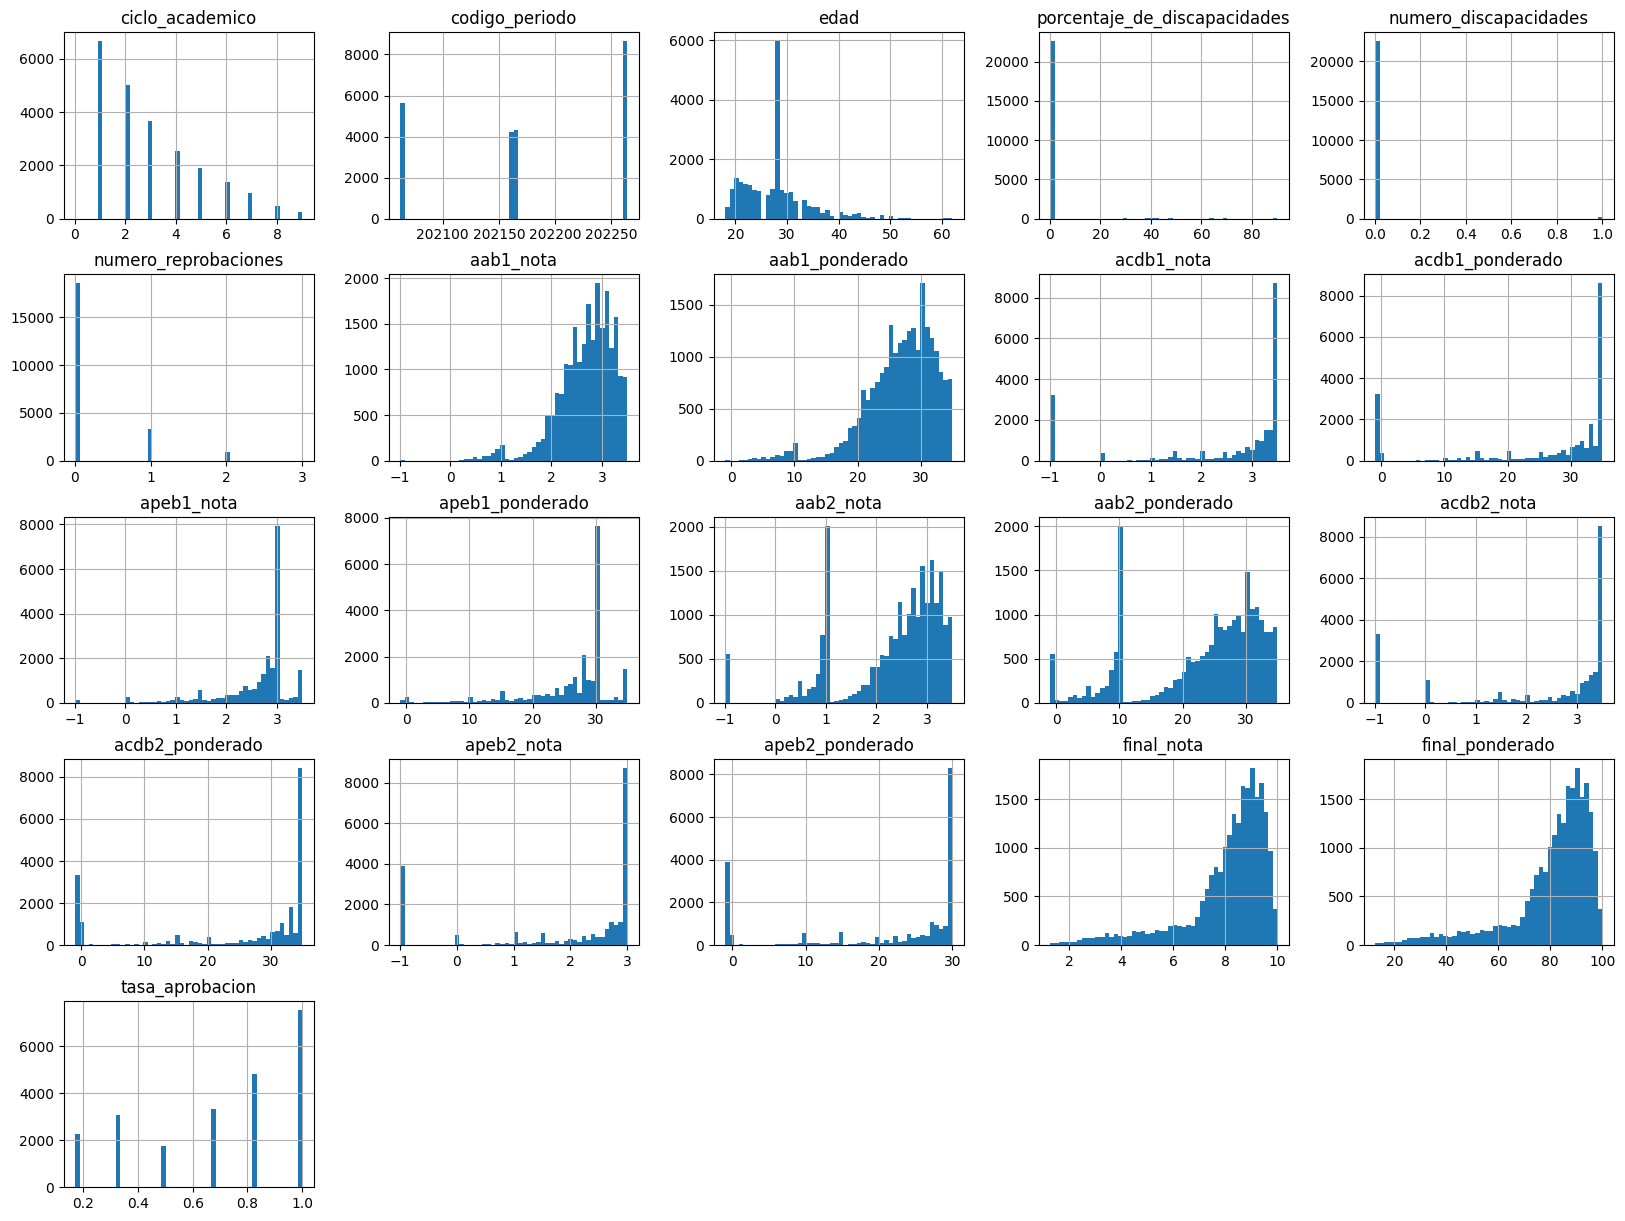

In [261]:
dataframe.hist(bins = 50, figsize = (20, 15))
plt.show

In [390]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Sexo'] = label_encoder.fit_transform(dataframe['sexo'])

In [391]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Tipo_de_est_programa'] = label_encoder.fit_transform(dataframe['tipo_de_est_programa'])

In [392]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Tipo_de_ingreso'] = label_encoder.fit_transform(dataframe['tipo_de_ingreso'])

In [393]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Estatus_curso'] = label_encoder.fit_transform(dataframe['estatus_cursos'])

In [394]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Discapacidad'] = label_encoder.fit_transform(dataframe['discapacidad'])

In [395]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Tipo_de_est_programa'] = label_encoder.fit_transform(dataframe['tipo_de_est_programa'])

In [396]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Status'] = label_encoder.fit_transform(dataframe['status'])

In [397]:
dataframe['tipo_de_ingreso'] = dataframe['tipo_de_ingreso'].map({'ADAPTACION DE CARRERA/MALLA': 0, 'CAMBIO DE MODALIDAD': 1, 'CAMBIO DE PROGRAMA': 2, 'DESCONOCIDA': 3, 'HOMOLOGACION EXTERNA': 4, 'INGRESO REGULAR': 5, 'REINICIO DE ESTUDIOS': 6, 'SEGUNDA TITULACION': 7, 'SIN ESPECIFICAR': 8})

In [398]:
# Crear un diccionario de mapeo de colores relacionados a un nombre común
region_mapping = {
    'QUITO': 'ECUADOR',
    'CUENCA': 'ECUADOR',
    'GUAYAQUIL': 'ECUADOR',
    'LOJA': 'ECUADOR',
    'SANTO DOMINGO' : 'ECUADOR',
    'ESPAÑA' : 'ESPAÑA',
    'ESTADOS UNIDOS' : 'ESTADOS UNIDOS',
    'ITALIA' : 'ITALIA'
}

# Aplicar el mapeo a la columna "Color"
dataframe['region'] = dataframe['region'].map(region_mapping)


In [399]:
dataframe['region'] = dataframe['region'].map({'ECUADOR': 0, 'ESPAÑA': 1, 'ESTADOS UNIDOS' : 2, 'ITALIA':3})

In [400]:
# Crear un diccionario de mapeo de colores relacionados a un nombre común
pago_mapping = {
    'ANTICIPOS BANCOS MANUALES': 'ANTICIPOS',
    'ANTICIPOS BANCOS ON LINE , BANCOS MANUALES': 'ANTICIPOS',
    'BANCOS EXTERIOR': 'BANCO',
    'BANCOS EXTERIOR , PLANES DE PAGO': 'BANCO',
    'BANCOS MANUALES' : 'BANCO',
    'BANCOS MANUALES , BANCOS ON LINE' : 'BANCO',
    'BANCOS MANUALES , CONVENIOS' : 'BANCO',
    'BANCOS MANUALES , PLANES DE PAGO' : 'BANCO',
    'BANCOS MANUALES , SALDOS INICIALES' : 'BANCO',
    'BANCOS MANUALES , TARJETA ONLINE' : 'BANCO',
    'BANCOS ON LINE' : 'BANCO',
    'BANCOS ON LINE , BANCOS ON LINE' : 'BANCO',
    'BANCOS ON LINE , PLANES DE PAGO' : 'BANCO',
    'BANCOS ON LINE , SALDOS INICIALES' : 'BANCO',
    'BANCOS ON LINE , TARJETA MANUALES' : 'BANCO',
    'PLANES DE PAGO' : 'PLAN DE PAGO',
    'PLANES DE PAGO , TARJETA ONLINE' : 'PLAN DE PAGO',
    'SALDOS INICIALES , TARJETA ONLINE' : 'PLAN DE PAGO',
    'TARJETA MANUALES' : 'TARJETA',
    'TARJETA ONLINE' : 'TARJETA',
    'TARJETA ONLINE , TARJETA ONLINE' : 'TARJETA',
    'SIN FORMA DE PAGO' : 'SIN FORMA DE PAGO',
    'CONVENIOS' : 'CONVENIOS',
}

# Aplicar el mapeo a la columna "Color"
dataframe['formas_de_pago'] = dataframe['formas_de_pago'].map(pago_mapping)

In [401]:
dataframe['formas_de_pago'] = dataframe['formas_de_pago'].map({'ANTICIPOS': 0, 'BANCO': 1, 'PLAN DE PAGO' : 2, 'TARJETA':3, 'CONVENIOS':4, 'SIN FORMA DE PAGO':5})

In [402]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Tipo_de_pago'] = label_encoder.fit_transform(dataframe['tipo_de_pago'])

In [403]:
categorias_principales = ['SIN BECA']

# Usar una función para aplicar la agrupación
dataframe['descripcion_de_becas'] = dataframe['descripcion_de_becas'].apply(lambda x: x if x in categorias_principales else 'CON BECA')

In [404]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Descripcion_beca'] = label_encoder.fit_transform(dataframe['descripcion_de_becas'])

In [405]:
categorias_principales = ['SIN DESCUENTO']

# Usar una función para aplicar la agrupación
dataframe['descripcion_descuento'] = dataframe['descripcion_descuento'].apply(lambda x: x if x in categorias_principales else 'CON DESCUENTO')

In [406]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Descripcion_descuento'] = label_encoder.fit_transform(dataframe['descripcion_descuento'])

In [407]:
categorias_principales = ['SIN CONVENIO Y CONTRATO']

# Usar una función para aplicar la agrupación
dataframe['convenios_y_contratos'] = dataframe['convenios_y_contratos'].apply(lambda x: x if x in categorias_principales else 'CON CONVENIO Y CONTRATO')

In [408]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Convenios_contratos'] = label_encoder.fit_transform(dataframe['convenios_y_contratos'])

In [409]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Formas_pago'] = label_encoder.fit_transform(dataframe['formas_de_pago'])

In [410]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Tipo_discapacidad'] = label_encoder.fit_transform(dataframe['tipo_discapacidad'])

In [411]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna "Nivel"
dataframe['Curso'] = label_encoder.fit_transform(dataframe['curso_codigo'])

In [412]:
print(dataframe.isnull().sum())

fake_identificacion      0
ciclo_academico          0
codigo_programa          0
codigo_malla             0
codigo_periodo           0
                        ..
Descripcion_descuento    0
Convenios_contratos      0
Formas_pago              0
Tipo_discapacidad        0
Curso                    0
Length: 61, dtype: int64


In [413]:
del dataframe['monto_descuento_automatico']
del dataframe['periodo_admision']
del dataframe['status']
del dataframe['sexo']
del dataframe['tipo_de_est_programa']
del dataframe['tipo_de_ingreso']
del dataframe['estatus_cursos']
del dataframe['discapacidad']
del dataframe['tipo_de_pago']
del dataframe['descripcion_de_becas']
del dataframe['descripcion_descuento']
del dataframe['convenios_y_contratos']
del dataframe['aab1_ponderado']
del dataframe['aab2_ponderado']
del dataframe['apeb2_ponderado']
del dataframe['acdb1_ponderado']
del dataframe['acdb2_ponderado']
del dataframe['apeb1_ponderado']
del dataframe['final_ponderado']
del dataframe['provincia']
del dataframe['canton']
del dataframe['codigo_periodo']
del dataframe['zona']
del dataframe['centro']
del dataframe['codigo_programa']
del dataframe['codigo_malla']
del dataframe['curso_codigo']
del dataframe['fake_identificacion']
del dataframe['estatus_de_pago']
del dataframe['curso_nombre']
del dataframe['porcentaje_des_matricula']
del dataframe['tipo_discapacidad']

In [414]:
dataframe.to_csv('datos1.csv', index=False)

In [415]:
print(dataframe.isnull().sum())

ciclo_academico                 0
region                          0
porcentaje_de_beca              0
formas_de_pago                  0
edad                            0
porcentaje_de_discapacidades    0
numero_discapacidades           0
numero_reprobaciones            0
aab1_nota                       0
acdb1_nota                      0
apeb1_nota                      0
aab2_nota                       0
acdb2_nota                      0
apeb2_nota                      0
final_nota                      0
tasa_aprobacion                 0
Sexo                            0
Tipo_de_est_programa            0
Tipo_de_ingreso                 0
Estatus_curso                   0
Discapacidad                    0
Status                          0
Tipo_de_pago                    0
Descripcion_beca                0
Descripcion_descuento           0
Convenios_contratos             0
Formas_pago                     0
Tipo_discapacidad               0
Curso                           0
dtype: int64


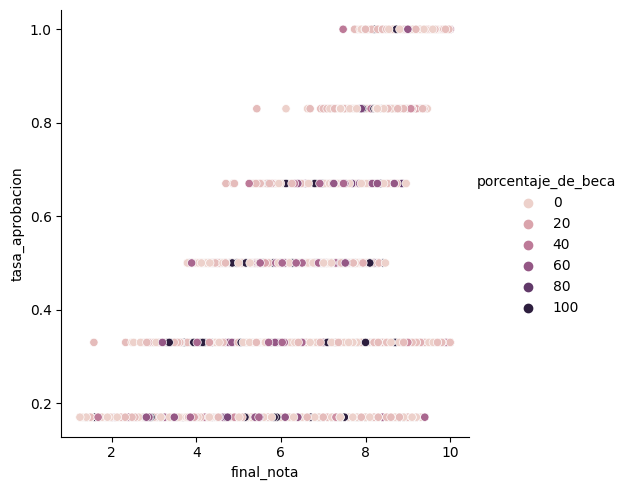

In [4]:
sns.relplot(x = "final_nota",y="tasa_aprobacion",hue="porcentaje_de_beca", data=dataframe)

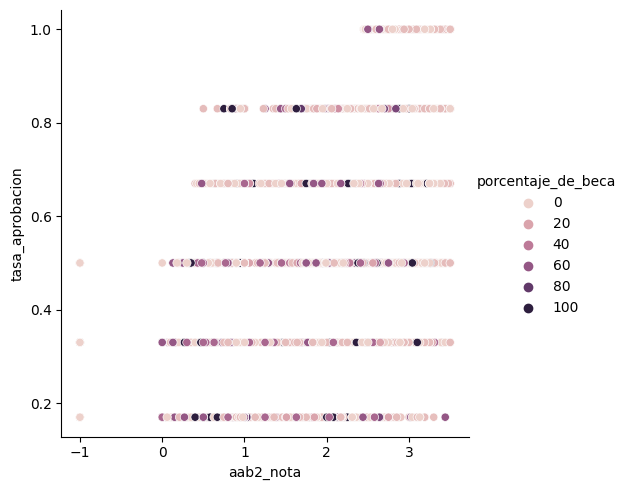

In [ ]:
sns.relplot(x = "aab2_nota",y="tasa_aprobacion",hue="porcentaje_de_beca", data=dataframe)